<a href="https://colab.research.google.com/github/ssawant/TensorFlow-in-Practice/blob/main/C3W2_NLP_Reading_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [59]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

# imdb_reviews : Large Movie Review Dataset. This is a dataset for binary sentiment classification 
# containing substantially more data than previous benchmark datasets. 
# We provide a set of 25,000 highly polar movie reviews for training, 
# and 25,000 for testing. There is additional unlabeled data for use as well.

In [60]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels= []

for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy()) # l - type EagerTensor convert it to numpy array

for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [61]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>" # OUT OF VOCAB

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index


sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)
# print(training_sentences[0])
# print(sequence[0])
# print(padded[0])
# print(word_index)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [62]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(6, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [63]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.6023 - accuracy: 0.6313 - val_loss: 0.3482 - val_accuracy: 0.8474
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2402 - accuracy: 0.9077 - val_loss: 0.3726 - val_accuracy: 0.8379
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.1026 - accuracy: 0.9749 - val_loss: 0.4432 - val_accuracy: 0.8298
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0284 - accuracy: 0.9963 - val_loss: 0.5271 - val_accuracy: 0.8283
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0063 - accuracy: 0.9996 - val_loss: 0.5856 - val_accuracy: 0.8298
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6355 - val_accuracy: 0.8300
Epoch 7/10
782/782 [==============================] - 4s 6ms/step - loss: 9.3134e-04 - accuracy: 1.0000 - val_loss: 0.6785 - val_accuracy: 0.8303
Ep

In [64]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [65]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

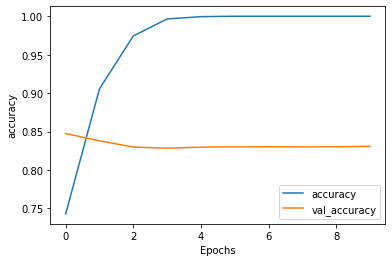

In [66]:
plot_graphs(history, 'accuracy')

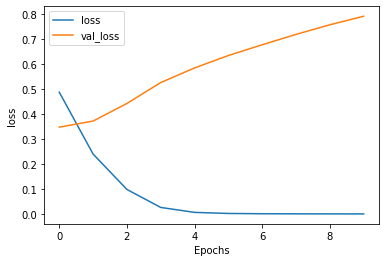

In [67]:
plot_graphs(history, 'loss')

In [68]:
sentence = "this is amazing i really like it. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[12, 7, 478, 11, 64, 38, 10, 1200]]
